<font size="+3"><strong>2.1. Predicting Price with Size</strong></font>

In [ ]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

warnings.simplefilter(action="ignore", category=FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Prepare Data

Import

Task 2.1.1: Write a function named wrangle that takes a file path as an argument and returns a DataFrame.

In [ ]:
def wrangle(filepath):
    # Read CSV file into dataframe
    df = pd.read_csv(filepath,encoding="ISO-8859-1")

    # Subset to properties in "Capital Federal"
    mask_ba= df["place_with_parent_names"].str.contains("Capital Federal")

    # Subset to apartments
    mask_apt=df["property_type"]=="apartment"

    # Subset to properties where "price_approx_usd" <400,000
    mask_price=df["price_aprox_usd"]<400_000

    # Subset
    df=df[mask_ba &  mask_apt &  mask_price ]

    # Remove outliers by "Surface_covered_in_m2"

    low, high=df["surface_covered_in_m2"].quantile([0.1,0.9])
    mask_area= df["surface_covered_in_m2"].between(low, high)
    df =df[mask_area]

    return df

Task 2.1.2: Use your wrangle function to create a DataFrame df from the CSV file data/buenos-aires-real-estate-1.csv.

In [ ]:
df = wrangle("/content/drive/MyDrive/Data Analyst/Python/Project_2/buenos-aires-real-estate-1.csv")
print("df shape:", df.shape)
df.head()

df shape: (1343, 16)


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,sell,apartment,|Argentina|Capital Federal|Constitución|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...
41,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0,http://once.properati.com.ar/suwa_venta_depart...


In [ ]:
# Check your work
assert (
    len(df) <= 8606
), f"`df` should have no more than 8606 observations, not {len(df)}."

In [ ]:
mask_ba= df["place_with_parent_names"].str.contains("Capital Federal")
df[mask_ba].head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,sell,apartment,|Argentina|Capital Federal|Constitución|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...
41,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0,http://once.properati.com.ar/suwa_venta_depart...


In [ ]:
mask_apt=df["property_type"]=="apartment"
mask_apt.head()

,property_type
4,True
9,True
29,True
40,True
41,True


In [ ]:
df["property_type"].unique()

array(['apartment'], dtype=object)

In [ ]:
df["currency"].unique()

array(['USD', 'ARS'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1343 entries, 4 to 8604
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   1343 non-null   object 
 1   property_type               1343 non-null   object 
 2   place_with_parent_names     1343 non-null   object 
 3   lat-lon                     1300 non-null   object 
 4   price                       1343 non-null   float64
 5   currency                    1343 non-null   object 
 6   price_aprox_local_currency  1343 non-null   float64
 7   price_aprox_usd             1343 non-null   float64
 8   surface_total_in_m2         965 non-null    float64
 9   surface_covered_in_m2       1343 non-null   float64
 10  price_usd_per_m2            927 non-null    float64
 11  price_per_m2                1343 non-null   float64
 12  floor                       379 non-null    float64
 13  rooms                       1078 non-n

In [ ]:
mask_price=df["price_aprox_usd"]<400_000
mask_price.head()

,price_aprox_usd
4,True
9,True
29,True
40,True
41,True


In [ ]:
# Check your work
assert (
    len(df) <= 1781
), f"`df` should have no more than 1781 observations, not {len(df)}."

Explore

Task 2.1.4: Create a histogram of "surface_covered_in_m2". Make sure that the x-axis has the label "Area [sq meters]" and the plot has the title "Distribution of Apartment Sizes

Text(0.5, 1.0, 'Distribution of Apartment Sizes')

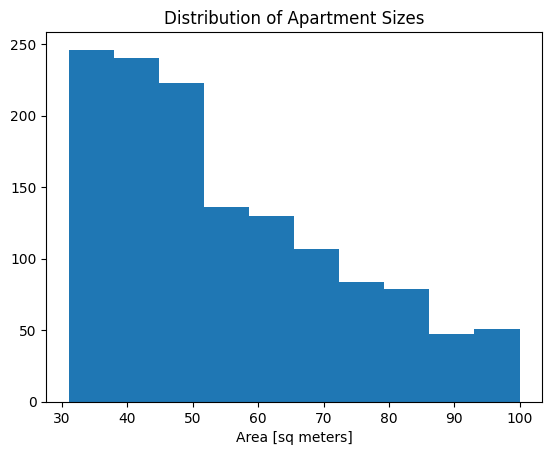

In [ ]:
plt.hist(df["surface_covered_in_m2"])
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Apartment Sizes")

Task 2.1.5: Calculate the summary statistics for df using the describe method.

In [ ]:
df.describe()["surface_covered_in_m2"]

,surface_covered_in_m2
count,1343.000000
mean,55.076694
std,18.160427
min,31.000000
25%,40.000000
50%,50.000000
75%,68.500000
max,100.000000


Task 2.1.6: Add to your wrangle function so that it removes observations that are outliers in the "surface_covered_in_m2" column. Specifically, all observations should fall between the 0.1 and 0.9 quantiles for "surface_covered_in_m2".

In [ ]:
low, high=df["surface_covered_in_m2"].quantile([0.1,0.9])
low

35.0

In [ ]:
mask_area= df["surface_covered_in_m2"].between(low, high)
mask_area

,surface_covered_in_m2
4,True
9,True
29,True
40,True
41,True
...,...
8589,True
8590,True
8593,True
8601,True


In [ ]:
low, high=df["surface_covered_in_m2"].quantile([0.1,0.9])
mask_area= df["surface_covered_in_m2"].between(low, high)

In [ ]:
# Check your work
assert len(df) <= 1343

Task 2.1.7: Create a scatter plot that shows price ("price_aprox_usd") vs area ("surface_covered_in_m2") in our dataset. Make sure to label your x-axis "Area [sq meters]" and your y-axis "Price [USD]"

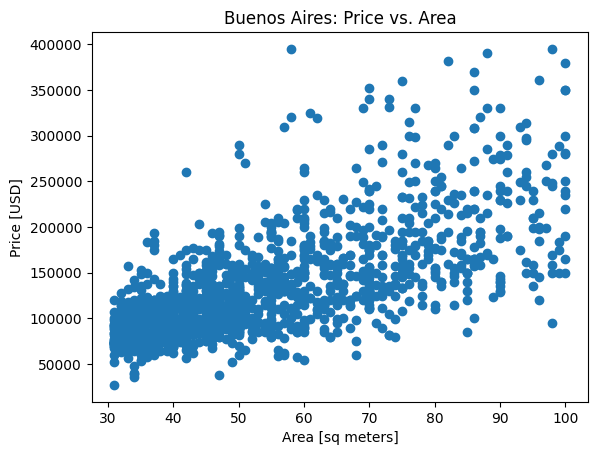

In [ ]:
plt.scatter(x=df["surface_covered_in_m2"], y= df["price_aprox_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Buenos Aires: Price vs. Area");

Split

Task 2.1.8: Create the feature matrix named X_train, which you'll use to train your model. It should contain one feature only: ["surface_covered_in_m2"]. Remember that your feature matrix should always be two-dimensional.

In [ ]:
features = ["surface_covered_in_m2"]
X_train = df[features]
X_train.shape

(1343, 1)

In [ ]:
X_train.head()

,surface_covered_in_m2
4,70.0
9,42.0
29,54.0
40,42.0
41,50.0


In [ ]:
# Check your work
assert X_train.shape == (
    1343,
    1,
), f"The shape of `X_train` should be (1343, 1), not {X_train.shape}."

Task 2.1.9: Create the target vector named y_train, which you'll use to train your model. Your target should be "price_aprox_usd". Remember that, in most cases, your target vector should be one-dimensional.

In [ ]:
target = "price_aprox_usd"
y_train = df[target]
y_train.head()

,price_aprox_usd
4,129000.0
9,87000.0
29,118000.0
40,57000.0
41,90000.0


In [ ]:
y_train.shape

(1343,)

In [ ]:
# Check your work
assert y_train.shape == (1343,)

###Build Model

Task 2.1.10: Calculate the mean of your target vector y_train and assign it to the variable y_mean.

In [ ]:
y_mean = y_train.mean()
y_mean

np.float64(135527.83871928515)

Task 2.1.11: Create a list named y_pred_baseline that contains the value of y_mean repeated so that it's the same length at y.

In [ ]:
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]

[np.float64(135527.83871928515),
 np.float64(135527.83871928515),
 np.float64(135527.83871928515),
 np.float64(135527.83871928515),
 np.float64(135527.83871928515)]

In [ ]:
len(y_pred_baseline) ==  len(y_train)

True

Task 2.1.12: Add a line to the plot below that shows the relationship between the observations X_train and our dumb model's predictions y_pred_baseline. Be sure that the line color is orange, and that it has the label "Baseline Model".

In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
X_train.head()

,surface_covered_in_m2
4,70.0
9,42.0
29,54.0
40,42.0
41,50.0


In [ ]:
X_train["surface_covered_in_m2"]

,surface_covered_in_m2
4,70.0
9,42.0
29,54.0
40,42.0
41,50.0
...,...
8589,42.0
8590,41.0
8593,43.0
8601,70.0


In [ ]:
type(X_train["surface_covered_in_m2"])

pandas.core.series.Series

In [ ]:
X_train.values[:5]

array([[70.],
       [42.],
       [54.],
       [42.],
       [50.]])

In [ ]:
type(X_train.values)

numpy.ndarray

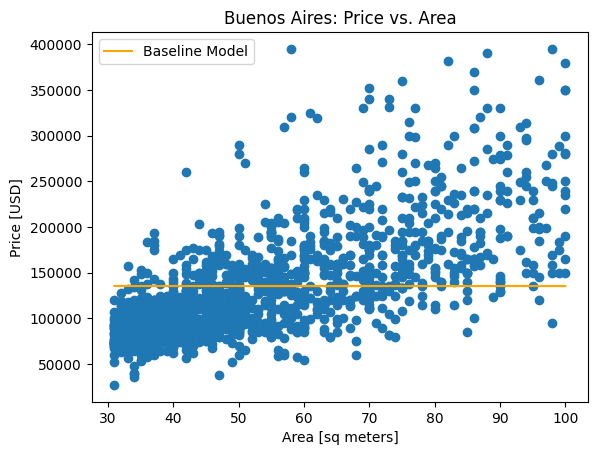

In [ ]:
plt.plot(X_train["surface_covered_in_m2"], y_pred_baseline, color="orange", label="Baseline Model")
plt.scatter(X_train, y_train)
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Buenos Aires: Price vs. Area")
plt.legend();

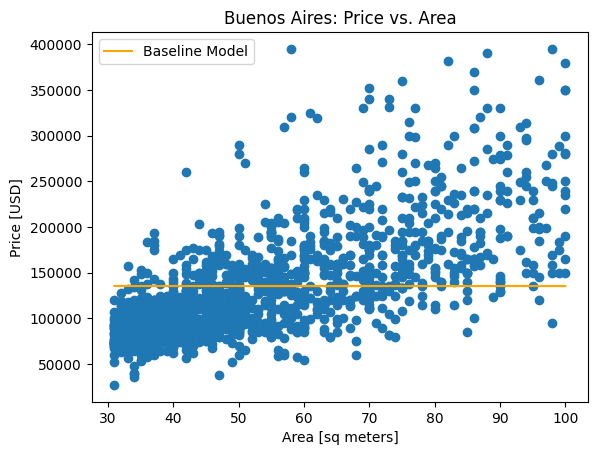

In [ ]:
plt.plot(X_train.values, y_pred_baseline, color="orange", label="Baseline Model")
plt.scatter(X_train, y_train)
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Buenos Aires: Price vs. Area")
plt.legend();

Task 2.1.13: Calculate the baseline mean absolute error for your predictions in y_pred_baseline as compared to the true targets in y.

In [ ]:
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 135527.84
Baseline MAE: 45199.46


## Iterate

Task 2.1.14: Instantiate a LinearRegression model named model.

In [ ]:
model = LinearRegression()

In [ ]:
# Check your work
assert isinstance(model, LinearRegression)

Task 2.1.15: Fit your model to the data, X_train and y_train.

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Check your work
check_is_fitted(model)

## Evaluate

Task 2.1.16: Using your model's predict method, create a list of predictions for the observations in your feature matrix X_train. Name this array y_pred_training.

In [ ]:
y_pred_training = model.predict(X_train)
y_pred_training[:5]

array([169151.87330223, 106064.44707446, 133101.91545779, 106064.44707446,
       124089.42599668])

In [ ]:
# Check your work
assert (
    len(y_pred_training) == 1343
), f"There should be 1343 predictions in `y_pred_training`, not {len(y_pred_training)}."

Task 2.1.17: Calculate your training mean absolute error for your predictions in y_pred_training as compared to the true targets in y_train.

In [ ]:
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 31248.26


Task 2.1.18: Run the code below to import your test data buenos-aires-test-features.csv into a DataFrame and generate a Series of predictions using your model. Then run the following cell to submit your predictions to the grader.

In [ ]:
X_test = pd.read_csv("/content/drive/MyDrive/Data Analyst/Python/Project_2/buenos-aires-test-features.csv",encoding="ISO-8859-1")[features]
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

,0
0,117330.058901
1,135355.037823
2,88039.468152
3,88039.468152
4,106064.447074


# Communicate Results

In [ ]:
model.intercept_

np.float64(11433.307732797926)

In [ ]:
round(model.intercept_)

11433

In [ ]:
intercept = round(model.intercept_)
print("Model Intercept:", intercept)
assert any([isinstance(intercept, int), isinstance(intercept, float)])

Model Intercept: 11433


**Task 2.1.20:** Extract the coefficient associated `"surface_covered_in_m2"` in your model, and assign it to the variable `coefficient`.

In [ ]:
coefficient = round(model.coef_[0], 2)
print('Model coefficient for "surface_covered_in_m2":', coefficient)
assert any([isinstance(coefficient, int), isinstance(coefficient, float)])

Model coefficient for "surface_covered_in_m2": 2253.12


**Task 2.1.21:** Complete the code below and run the cell to print the equation that your model has determined for predicting apartment price based on size.

In [ ]:
print(f"apt_price= {intercept} + {coefficient}*surface_covered")

apt_price= 11433 + 2253.12*surface_covered


**Task 2.1.22:** Add a line to the plot below that shows the relationship between the observations in `X_train` and your model's predictions `y_pred_training`. Be sure that the line color is red, and that it has the label `"Linear Model"`

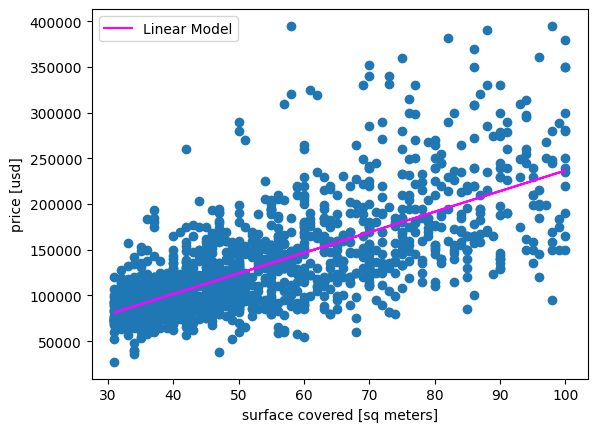

In [ ]:
plt.plot(X_train.values, model.predict(X_train), color="magenta", label="Linear Model")
plt.scatter(X_train, y_train)
plt.xlabel("surface covered [sq meters]")
plt.ylabel("price [usd]")
plt.legend();

<font size="+3"><strong>2.1. Predicting Price with Size</strong></font>

In [ ]:
import warnings

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

from IPython.display import VimeoVideo
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted

warnings.simplefilter(action="ignore", category=FutureWarning)

# Prepare Data

## Import

In [ ]:
def wrangle(filepath):
    # Read CSV file
    df = pd.read_csv(filepath,encoding="ISO-8859-1")

    # Subset data: Apartments in "Capital Federal", less than 400,000
    mask_ba = df["place_with_parent_names"].str.contains("Capital Federal")
    mask_apt = df["property_type"] == "apartment"
    mask_price = df["price_aprox_usd"] < 400_000
    df = df[mask_ba & mask_apt & mask_price]

    # Subset data: Remove outliers for "surface_covered_in_m2"
    low, high = df["surface_covered_in_m2"].quantile([0.1, 0.9])
    mask_area = df["surface_covered_in_m2"].between(low, high)
    df = df[mask_area]

    # Split the lat-lon col
    df[["lat","lon"]]=df["lat-lon"].str.split(",", expand= True).astype(float)
    df.drop(columns="lat-lon", inplace= True)

    return df

**Task 2.2.1:** Use your `wrangle` function to create a DataFrame `frame1` from the CSV file

In [ ]:
frame1 = wrangle("/content/drive/MyDrive/Data Analyst/Python/Project_2/buenos-aires-real-estate-1.csv")
print(frame1.info())
frame1.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1343 entries, 4 to 8604
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   1343 non-null   object 
 1   property_type               1343 non-null   object 
 2   place_with_parent_names     1343 non-null   object 
 3   price                       1343 non-null   float64
 4   currency                    1343 non-null   object 
 5   price_aprox_local_currency  1343 non-null   float64
 6   price_aprox_usd             1343 non-null   float64
 7   surface_total_in_m2         965 non-null    float64
 8   surface_covered_in_m2       1343 non-null   float64
 9   price_usd_per_m2            927 non-null    float64
 10  price_per_m2                1343 non-null   float64
 11  floor                       379 non-null    float64
 12  rooms                       1078 non-null   float64
 13  expenses                    349 non-nu

,operation,property_type,place_with_parent_names,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,lat,lon
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...,-34.584651,-58.454693
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...,-34.638979,-58.500115
29,sell,apartment,|Argentina|Capital Federal|Caballito|,118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...,-34.615847,-58.459957
40,sell,apartment,|Argentina|Capital Federal|Constitución|,57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...,-34.625222,-58.382382
41,sell,apartment,|Argentina|Capital Federal|Once|,90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0,http://once.properati.com.ar/suwa_venta_depart...,-34.610610,-58.412511


**Task 2.2.2:** Add to the `wrangle` function below so that, in the DataFrame it returns, the `"lat-lon"` column is replaced by separate `"lat"` and `"lon"` columns. Don't forget to also drop the `"lat-lon"` column. Be sure to rerun all the cells above before you continue.

In [ ]:
#frame1["lat-lon"].str.split(",", expand= True).astype(float)

In [ ]:
# Check your work
assert (
    frame1.shape[0] == 1343
), f"`frame1` should have 1343 rows, not {frame1.shape[0]}."
assert frame1.shape[1] == 17, f"`frame1` should have 17 columns, not {frame1.shape[1]}."

**Task 2.2.3:** Use you revised `wrangle` function create a DataFrames `frame2` from the file `data/buenos-aires-real-estate-2.csv`.

In [ ]:
frame2 = wrangle("/content/drive/MyDrive/Data Analyst/Python/Project_2/buenos-aires-real-estate-2.csv")

In [ ]:
# Check your work
assert (
    frame2.shape[0] == 1315
), f"`frame1` should have 1315 rows, not {frame2.shape[0]}."
assert frame2.shape[1] == 17, f"`frame1` should have 17 columns, not {frame2.shape[1]}."

**Task 2.2.4:** Use [`pd.concat`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) to concatenate `frame1` and `frame2` into a new DataFrame `df`. Make sure you set the `ignore_index` argument to `True`.

In [ ]:
frame1.head()

,operation,property_type,place_with_parent_names,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,lat,lon
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...,-34.584651,-58.454693
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...,-34.638979,-58.500115
29,sell,apartment,|Argentina|Capital Federal|Caballito|,118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...,-34.615847,-58.459957
40,sell,apartment,|Argentina|Capital Federal|Constitución|,57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...,-34.625222,-58.382382
41,sell,apartment,|Argentina|Capital Federal|Once|,90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0,http://once.properati.com.ar/suwa_venta_depart...,-34.610610,-58.412511


In [ ]:
frame2.head()

,operation,property_type,place_with_parent_names,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,lat,lon
2,sell,apartment,|Argentina|Capital Federal|Recoleta|,215000.0,USD,3259916.00,215000.00,40.0,35.0,5375.000000,6142.857143,NaN,1.0,3500.0,http://recoleta.properati.com.ar/12j4v_venta_d...,-34.588993,-58.400133
9,sell,apartment,|Argentina|Capital Federal|Recoleta|,341550.0,USD,5178717.72,341550.00,NaN,90.0,NaN,3795.000000,8.0,2.0,NaN,http://recoleta.properati.com.ar/100t0_venta_d...,-34.588044,-58.398066
12,sell,apartment,|Argentina|Capital Federal|Monserrat|,1386000.0,ARS,1382153.13,91156.62,39.0,33.0,2337.349231,42000.000000,NaN,NaN,NaN,http://monserrat.properati.com.ar/t05l_venta_d...,-34.623320,-58.397461
13,sell,apartment,|Argentina|Capital Federal|Belgrano|,105000.0,USD,1592052.00,105000.00,NaN,33.0,NaN,3181.818182,1.0,1.0,NaN,http://belgrano.properati.com.ar/zsd5_venta_de...,-34.553897,-58.451939
17,sell,apartment,|Argentina|Capital Federal|Villa del Parque|,89681.0,USD,1359779.19,89681.00,46.0,39.0,1949.586957,2299.512821,NaN,1.0,1500.0,http://villa-del-parque.properati.com.ar/12q2f...,-34.628813,-58.472230


In [ ]:
df = pd.concat([frame1, frame2], ignore_index= True)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2658 entries, 0 to 2657
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   2658 non-null   object 
 1   property_type               2658 non-null   object 
 2   place_with_parent_names     2658 non-null   object 
 3   price                       2658 non-null   float64
 4   currency                    2658 non-null   object 
 5   price_aprox_local_currency  2658 non-null   float64
 6   price_aprox_usd             2658 non-null   float64
 7   surface_total_in_m2         1898 non-null   float64
 8   surface_covered_in_m2       2658 non-null   float64
 9   price_usd_per_m2            1818 non-null   float64
 10  price_per_m2                2658 non-null   float64
 11  floor                       769 non-null    float64
 12  rooms                       2137 non-null   float64
 13  expenses                    688 n

,operation,property_type,place_with_parent_names,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,lat,lon
0,sell,apartment,|Argentina|Capital Federal|Chacarita|,129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...,-34.584651,-58.454693
1,sell,apartment,|Argentina|Capital Federal|Villa Luro|,87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...,-34.638979,-58.500115
2,sell,apartment,|Argentina|Capital Federal|Caballito|,118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...,-34.615847,-58.459957
3,sell,apartment,|Argentina|Capital Federal|Constitución|,57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...,-34.625222,-58.382382
4,sell,apartment,|Argentina|Capital Federal|Once|,90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0,http://once.properati.com.ar/suwa_venta_depart...,-34.610610,-58.412511


In [ ]:
# Check your work
assert df.shape == (2658, 17), f"`df` is the wrong size: {df.shape}"

## Explore

**Task 2.2.5:** Complete the code below to create a [Mapbox scatter plot](https://plotly.github.io/plotly.py-docs/generated/plotly.express.scatter_mapbox.html) that shows the location of the apartments in `df`.

In [ ]:
fig = px.scatter_mapbox(
    df,  # Our DataFrame
    lat="lat",
    lon="lon",
    width=600,  # Width of map
    height=600,  # Height of map
    color="price_aprox_usd",
    hover_data=["price_aprox_usd"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

**Task 2.2.6:** Complete the code below to create a 3D scatter plot, with `"lon"` on the x-axis, `"lat"` on the y-axis, and `"price_aprox_usd"` on the z-axis.

In [ ]:
# Create 3D scatter plot
fig = px.scatter_3d(
    df,
    x="lon",
    y="lat",
    z="price_aprox_usd",
    labels={"lon": "longitude", "lat": "latitude", "price_aprox_usd": "price"},
    width=600,
    height=500,
)

# Refine formatting
fig.update_traces(
    marker={"size": 4, "line": {"width": 2, "color": "DarkSlateGrey"}},
    selector={"mode": "markers"},
)

# Display figure
fig.show()

## Split

**Task 2.2.7:** Create the feature matrix named `X_train`. It should contain two features: `["lon", "lat"]`.

In [ ]:
features = ["lon", "lat"]
X_train = df[features]
X_train.shape

(2658, 2)

**Task 2.2.8:** Create the target vector named `y_train`, which you'll use to train your model. Your target should be `"price_aprox_usd"`. Remember that, in most cases, your target vector should be one-dimensional.

In [ ]:
target = "price_aprox_usd"
y_train = df[target]
y_train.head()

,price_aprox_usd
0,129000.0
1,87000.0
2,118000.0
3,57000.0
4,90000.0


In [ ]:
y_train.shape

(2658,)

# Build Model

## Baseline

**Task 2.2.9:** Calculate the mean of your target vector `y_train` and assign it to the variable `y_mean`.

In [ ]:
y_mean = y_train.mean()

**Task 2.2.10:** Create a list named `y_pred_baseline` that contains the value of `y_mean` repeated so that it's the same length at `y_train`.

In [ ]:
y_pred_baseline =[y_mean]*len(y_train)
y_pred_baseline[:5]

[np.float64(134732.97340481562),
 np.float64(134732.97340481562),
 np.float64(134732.97340481562),
 np.float64(134732.97340481562),
 np.float64(134732.97340481562)]

**Task 2.2.11:** Calculate the baseline mean absolute error for your predictions in `y_pred_baseline` as compared to the true targets in `y_train`.

In [ ]:
mae_baseline = mean_absolute_error(y_train, y_pred_baseline )

print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 134732.97
Baseline MAE: 45422.75


## Iterate

**Task 2.2.12:** Instantiate a [`SimpleImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) named `imputer`.

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2658 entries, 0 to 2657
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lon     2561 non-null   float64
 1   lat     2561 non-null   float64
dtypes: float64(2)
memory usage: 41.7 KB


In [ ]:
model=LinearRegression()
model.fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
imputer = SimpleImputer()

In [ ]:
# Check your work
assert isinstance(imputer, SimpleImputer)

**Task 2.2.13:** Fit your transformer `imputer` to the feature matrix `X`.

In [ ]:
imputer.fit(X_train)

SimpleImputer()

In [ ]:
# Check your work
check_is_fitted(imputer)

**Task 2.2.14:** Use your `imputer` to transform the feature matrix `X_train`. Assign the transformed data to the variable `XT_train`.

In [ ]:
XT_train = imputer.transform(X_train)
pd.DataFrame(XT_train, columns=X_train.columns).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2658 entries, 0 to 2657
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lon     2658 non-null   float64
 1   lat     2658 non-null   float64
dtypes: float64(2)
memory usage: 41.7 KB


In [ ]:
# Check your work
assert XT_train.shape == (2658, 2), f"`XT_train` is the wrong shape: {XT_train.shape}"
assert (
    np.isnan(XT_train).sum() == 0
), "Your feature matrix still has `NaN` values. Did you forget to transform is using `imputer`?"

**Task 2.2.15:** Create a pipeline named `model` that contains a `SimpleImputer` transformer followed by a `LinearRegression` predictor.

In [ ]:
model = make_pipeline(
    SimpleImputer(),
    LinearRegression()
)

In [ ]:
assert isinstance(model, Pipeline), "Did you instantiate your model?"

**Task 2.2.16:** Fit your model to the data, `X_train` and `y_train`.

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

In [ ]:
# Check your work
check_is_fitted(model["linearregression"])

## Evaluate

**Task 2.2.17:** Using your model's [`predict`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict) method, create a list of predictions for the observations in your feature matrix `X_train`. Name this list `y_pred_training`.

In [ ]:
y_pred_training =model.predict(X_train)

In [ ]:
# Check your work
assert y_pred_training.shape == (2658,)

**Task 2.2.18:** Calculate the training mean absolute error for your predictions in `y_pred_training` as compared to the true targets in `y_train`.


In [ ]:
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 42962.72


**Task 2.2.19:** Run the code below to import your test data `buenos-aires-test-features.csv` into a DataFrame and generate a Series of predictions using your model. Then run the following cell to submit your predictions to the grader.

In [ ]:
X_test = pd.read_csv("/content/drive/MyDrive/Data Analyst/Python/Project_2/buenos-aires-test-features.csv",encoding="ISO-8859-1")[features]
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

,0
0,136372.324695
1,168620.352353
2,130231.628267
3,102497.549527
4,123482.077850


# Communicate Results

**Task 2.2.20:** Extract the intercept and coefficients for your model.

In [ ]:
intercept = model.named_steps["linearregression"].intercept_.round()
intercept

np.float64(38113587.0)

In [ ]:
coefficients = model.named_steps["linearregression"].coef_.round()
coefficients

array([196709., 765467.])

**Task 2.2.21:** Complete the code below and run the cell to print the equation that your model has determined for predicting apartment price based on latitude and longitude.

In [ ]:
print(

    f"price = {intercept} + ({coefficients[0]} * longitude) + ({coefficients[1]} * latitude)"
)

price = 38113587.0 + (196709.0 * longitude) + (765467.0 * latitude)


**Task 2.2.22:** Complete the code below to create a 3D scatter plot, with `"lon"` on the x-axis, `"lat"` on the y-axis, and `"price_aprox_usd"` on the z-axis.

In [ ]:
# Create 3D scatter plot
fig = px.scatter_3d(
    df,
    x="lon",
    y="lat",
    z="price_aprox_usd",
    labels={"lon": "longitude", "lat": "latitude", "price_aprox_usd": "price"},
    width=600,
    height=500,
)

# Create x and y coordinates for model representation
x_plane = np.linspace(df["lon"].min(), df["lon"].max(), 10)
y_plane = np.linspace(df["lat"].min(), df["lat"].max(), 10)
xx, yy = np.meshgrid(x_plane, y_plane)

# Use model to predict z coordinates
z_plane = model.predict(pd.DataFrame({"lon": x_plane, "lat": y_plane}))
zz = np.tile(z_plane, (10, 1))

# Add plane to figure
fig.add_trace(go.Surface(x=xx, y=yy, z=zz))

# Refine formatting
fig.update_traces(
    marker={"size": 4, "line": {"width": 2, "color": "DarkSlateGrey"}},
    selector={"mode": "markers"},
)

# Display figure
fig.show()

<font size="+3"><strong>2.3. Predicting Price with Neighborhood</strong></font>

In [ ]:
import warnings
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.5 MB/s eta 0:00:00


In [ ]:
from category_encoders import OneHotEncoder

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge  # noqa F401
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.utils.validation import check_is_fitted

warnings.simplefilter(action="ignore", category=FutureWarning)

# Prepare Data

## Import

In [ ]:
def wrangle(filepath):
    # Read CSV file
    df = pd.read_csv(filepath,encoding="ISO-8859-1")

    # Subset data: Apartments in "Capital Federal", less than 400,000
    mask_ba = df["place_with_parent_names"].str.contains("Capital Federal")
    mask_apt = df["property_type"] == "apartment"
    mask_price = df["price_aprox_usd"] < 400_000
    df = df[mask_ba & mask_apt & mask_price]

    # Subset data: Remove outliers for "surface_covered_in_m2"
    low, high = df["surface_covered_in_m2"].quantile([0.1, 0.9])
    mask_area = df["surface_covered_in_m2"].between(low, high)
    df = df[mask_area]

    # Split "lat-lon" column
    df[["lat", "lon"]] = df["lat-lon"].str.split(",", expand=True).astype(float)
    df.drop(columns="lat-lon", inplace=True)

    # Extract neighborhood
    df["neighborhood"]=df["place_with_parent_names"].str.split("|", expand=True)[3]
    df.drop(columns="place_with_parent_names", inplace= True)
    return df

**Task 2.3.1:** Use [`glob`](https://docs.python.org/3/library/glob.html#glob.glob) to create a list that contains the filenames for all the Buenos Aires real estate CSV files in the `data` directory. Assign this list to the variable name `files`.

In [ ]:
files = glob("/content/drive/MyDrive/Data Analyst/Python/Project_2/buenos-aires-real-estate-*.csv")
files

['/content/drive/MyDrive/Data Analyst/Python/Project_2/buenos-aires-real-estate-1.csv',
 '/content/drive/MyDrive/Data Analyst/Python/Project_2/buenos-aires-real-estate-2.csv',
 '/content/drive/MyDrive/Data Analyst/Python/Project_2/buenos-aires-real-estate-3.csv',
 '/content/drive/MyDrive/Data Analyst/Python/Project_2/buenos-aires-real-estate-4.csv',
 '/content/drive/MyDrive/Data Analyst/Python/Project_2/buenos-aires-real-estate-5.csv']

In [ ]:
# Check your work
assert len(files) == 5, f"`files` should contain 5 items, not {len(files)}"

**Task 2.3.2:** Use your `wrangle` function in a `for` loop to create a list named `frames`. The list should the cleaned DataFrames created from the CSV filenames your collected in `files`.


In [ ]:
frames=[]
for file in files:
  df=wrangle(file)
  frames.append(df)

In [ ]:
len(frames)

5

In [ ]:
frames[0].head()

,operation,property_type,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,lat,lon,neighborhood
4,sell,apartment,129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...,-34.584651,-58.454693,Chacarita
9,sell,apartment,87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...,-34.638979,-58.500115,Villa Luro
29,sell,apartment,118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...,-34.615847,-58.459957,Caballito
40,sell,apartment,57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...,-34.625222,-58.382382,Constitución
41,sell,apartment,90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0,http://once.properati.com.ar/suwa_venta_depart...,-34.610610,-58.412511,Once


In [ ]:
# Check your work
assert len(frames) == 5, f"`frames` should contain 5 items, not {len(frames)}"
assert all(
    [isinstance(frame, pd.DataFrame) for frame in frames]
), "The items in `frames` should all be DataFrames."

**Task 2.3.3:** Use [`pd.concat`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) to concatenate the items in `frames` into a single DataFrame `df`. Make sure you set the `ignore_index` argument to `True`.

In [ ]:
df = pd.concat(frames, ignore_index=True)
df.shape

(6582, 17)

In [ ]:
df.head()

,operation,property_type,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,lat,lon,neighborhood
0,sell,apartment,129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...,-34.584651,-58.454693,Chacarita
1,sell,apartment,87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...,-34.638979,-58.500115,Villa Luro
2,sell,apartment,118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...,-34.615847,-58.459957,Caballito
3,sell,apartment,57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...,-34.625222,-58.382382,Constitución
4,sell,apartment,90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0,http://once.properati.com.ar/suwa_venta_depart...,-34.610610,-58.412511,Once


In [ ]:
# Check your work
assert len(df) == 6582, f"`df` is the wrong size: {len(df)}."

## Explore

**Task 2.3.4:** Modify your `wrangle` function to create a new feature `"neighborhood"`. You can find the neighborhood for each property in the `"place_with_parent_names"` column. For example, a property with the place name `"|Argentina|Capital Federal|Palermo|"` is located in the neighborhood is `"Palermo"`. Also, your function should drop the `"place_with_parent_names"` column.

Be sure to rerun all the cells above before you continue.

- [<span id='technique'>Split the strings in one column to create another using <span id='tool'>pandas.](../%40textbook/03-pandas-getting-started.ipynb#Splitting-Strings)

In [ ]:
#df["place_with_parent_names"].str.split("|", expand=True)[3].head()

## Split

**Task 2.3.5:** Create your feature matrix `X_train` and target vector `y_train`. `X_train` should contain one feature: `"neighborhood"`. Your target is `"price_aprox_usd"`.

- [What's a <span id='term'>feature matrix?](../%40textbook/15-ml-regression.ipynb#Linear-Regression)
- [What's a <span id='term'>target vector?](../%40textbook/15-ml-regression.ipynb#Linear-Regression)
- [<span id='technique'>Subset a DataFrame by selecting one or more columns in <span id='tool'>pandas.](../%40textbook/04-pandas-advanced.ipynb#Subset-a-DataFrame-by-Selecting-One-or-More-Columns)
- [<span id='technique'>Select a Series from a DataFrame in <span id='tool'>pandas.](../%40textbook/04-pandas-advanced.ipynb#Select-a-Series-from-a-DataFrame)

In [ ]:
target = "price_aprox_usd"
features = ["neighborhood"]
y_train = df[target]
X_train = df[features]

In [ ]:
# Check your work
assert X_train.shape == (6582, 1), f"`X_train` is the wrong size: {X_train.shape}."
assert y_train.shape == (6582,), f"`y_train` is the wrong size: {y_train.shape}."

# Build Model

## Baseline

**Task 2.3.6:** Calculate the baseline mean absolute error for your model.

- [<span id='term'>What's a performance metric?](../%40textbook/12-ml-core.ipynb#Performance-Metrics)
- [<span id='term'>What's mean absolute error?](../%40textbook/12-ml-core.ipynb#Performance-Metrics)
- [<span id='technique'>Calculate summary statistics for a DataFrame or Series in <span id='tool'>pandas.](../%40textbook/05-pandas-summary-statistics.ipynb#Working-with-Summary-Statistics)
- [<span id='technique'>Calculate the mean absolute error for a list of predictions in <span id='tool'>scikit-learn.](../%40textbook/15-ml-regression.ipynb#Calculating-the-Mean-Absolute-Error-for-a-List-of-Predictions)

In [ ]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean]*len(y_train)
print("Mean apt price:", y_mean)

print("Baseline MAE:", mean_absolute_error(y_train, y_pred_baseline ))

Mean apt price: 132383.83701458524
Baseline MAE: 44860.10834274133


## Iterate

**Task 2.3.7:** First, instantiate a `OneHotEncoder` named `ohe`. Make sure to set the `use_cat_names` argument to `True`. Next, fit your transformer to the feature matrix `X_train`. Finally, use your encoder to transform the feature matrix `X_train`, and assign the transformed data to the variable `XT_train`.

- [What's <span id='term'>one-hot encoding?](../%40textbook/13-ml-data-pre-processing-and-production.ipynb#One-Hot-Encoding)
- [<span id='technique'>Instantiate a transformer in <span id='tool'>scikit-learn.](../%40textbook/13-ml-data-pre-processing-and-production.ipynb#One-Hot-Encoding)
- [<span id='technique'>Fit a transformer to training data in <span id='tool'>scikit-learn.](../%40textbook/13-ml-data-pre-processing-and-production.ipynb#One-Hot-Encoding)
- [<span id='technique'>Transform data using a transformer in <span id='tool'>scikit-learn.](../%40textbook/13-ml-data-pre-processing-and-production.ipynb#One-Hot-Encoding)

In [ ]:
X_train.head()

,neighborhood
0,Chacarita
1,Villa Luro
2,Caballito
3,Constitución
4,Once


In [ ]:
model=LinearRegression()
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Chacarita'

In [ ]:
# Instantantiate
ohe = OneHotEncoder(use_cat_names=True)
# Fit
ohe.fit(X_train)
# Transform
XT_train = ohe.transform(X_train)
print(XT_train.shape)
XT_train.head()

(6582, 57)


,neighborhood_Chacarita,neighborhood_Villa Luro,neighborhood_Caballito,neighborhood_Constitución,neighborhood_Once,neighborhood_Almagro,neighborhood_Palermo,neighborhood_Flores,neighborhood_Belgrano,neighborhood_Liniers,...,neighborhood_Puerto Madero,neighborhood_Agronomía,neighborhood_Monte Castro,neighborhood_Tribunales,neighborhood_Villa Santa Rita,neighborhood_Velez Sarsfield,neighborhood_Villa Soldati,neighborhood_Villa Real,neighborhood_Pompeya,neighborhood_Catalinas
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Check your work
assert XT_train.shape == (6582, 57), f"`XT_train` is the wrong shape: {XT_train.shape}"

**Task 2.3.8:** Create a pipeline named `model` that contains a `OneHotEncoder` transformer and a `LinearRegression` predictor. Then fit your model to the training data.

- [What's a <span id='term'>pipeline?](../%40textbook/13-ml-data-pre-processing-and-production.ipynb#scikit-learn-in-Production)
- [<span id='technique'>Create a pipeline in <span id='tool'>scikit-learn.](../%40textbook/13-ml-data-pre-processing-and-production.ipynb#Creating-a-Pipeline-in-scikit-learn)

In [ ]:
model = make_pipeline(
    OneHotEncoder(use_cat_names = True),
    LinearRegression()
)
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['neighborhood'], use_cat_names=True)),
                ('linearregression', LinearRegression())])

In [ ]:
# Check your work
check_is_fitted(model[-1])

## Evaluate

**Task 2.3.9:** First, create a list of predictions for the observations in your feature matrix `X_train`. Name this list `y_pred_training`. Then calculate the training mean absolute error for your predictions in `y_pred_training` as compared to the true targets in `y_train`.

- [<span id='technique'>Generate predictions using a trained model in <span id='tool'>scikit-learn.](../%40textbook/15-ml-regression.ipynb#Generating-Predictions-Using-a-Trained-Model)
- [<span id='technique'>Calculate the mean absolute error for a list of predictions in <span id='tool'>scikit-learn.](../%40textbook/15-ml-regression.ipynb#Calculating-the-Mean-Absolute-Error-for-a-List-of-Predictions)

In [ ]:
y_pred_training = model.predict(X_train)
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 39339.72


**Task 2.3.10:** Run the code below to import your test data `buenos-aires-test-features.csv` into a DataFrame and generate a Series of predictions using your model. Then run the following cell to submit your predictions to the grader.

- [What's generalizability?](../%40textbook/12-ml-core.ipynb#Generalization)
- [<span id='technique'>Generate predictions using a trained model in <span id='tool'>scikit-learn.](../%40textbook/15-ml-regression.ipynb#Generating-Predictions-Using-a-Trained-Model)
- [<span id='technique'>Calculate the mean absolute error for a list of predictions in <span id='tool'>scikit-learn.](../%40textbook/15-ml-regression.ipynb#Calculating-the-Mean-Absolute-Error-for-a-List-of-Predictions)

In [ ]:
X_test = pd.read_csv("/content/drive/MyDrive/Data Analyst/Python/Project_2/buenos-aires-test-features.csv",encoding="ISO-8859-1")[features]
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

,0
0,249409.478261
1,161530.079797
2,98036.930192
3,110675.394444
4,127796.268745


In [ ]:
y_test=pd.read_csv("/content/drive/MyDrive/Data Analyst/Python/Project_2/buenos-aires-test-target.csv",encoding="ISO-8859-1")
y_test.head()

# Communicate Results

If we write out the equation for our model, it'll be too big to fit on the screen. That's because, when we used the `OneHotEncoder` to encode the neighborhood data, we created a much wider DataFrame, and each column/feature has it's own coefficient in our model's equation.

<center><img src="../images/proj-2.006.png" alt="Equation: y = β0 + β1 x1 + β2 x2 + ... + β59 x59 + β60 x60 " style="width: 800px;"/></center>

This is important to keep in mind for two reasons. First, it means that this is a **high-dimensional** model. Instead of a 2D or 3D plot, we'd need a 58-dimensional plot to represent it, which is impossible! Second, it means that we'll need to extract and represent the information for our equation a little differently than before. Let's start by getting our intercept and coefficient.

In [ ]:
intercept = model.named_steps["linearregression"].intercept_
intercept

np.float64(117472.01710280389)

In [ ]:
coefficients = model.named_steps["linearregression"].coef_
print("coefficients len:", len(coefficients))
print(coefficients[:5])  # First five coefficients

coefficients len: 57
[ -1910.75043614   1046.27470672  10324.25164214 -41623.85243614
  -2217.13905402]


In [ ]:
# Check your work
assert isinstance(
    intercept, float
), f"`intercept` should be a `float`, not {type(intercept)}."
assert isinstance(
    coefficients, np.ndarray
), f"`coefficients` should be a `float`, not {type(coefficients)}."
assert coefficients.shape == (
    57,
), f"`coefficients` is wrong shape: {coefficients.shape}."

**Task 2.3.12:** Extract the feature names of your encoded data from the `OneHotEncoder` in your model.

- [Access an object in a pipeline in scikit-learn.](../%40textbook/13-ml-data-pre-processing-and-production.ipynb#Accessing-an-Object-in-a-Pipeline)

In [ ]:
feature_names = model.named_steps["onehotencoder"].get_feature_names()
print("features len:", len(feature_names))
print(feature_names[:5])  # First five feature names

features len: 57
['neighborhood_Chacarita' 'neighborhood_Villa Luro'
 'neighborhood_Caballito' 'neighborhood_Constitución' 'neighborhood_Once']


In [ ]:
# Check your work
assert isinstance(
    feature_names, np.ndarray
), f"`features` should be a `list`, not {type(feature_names)}."
assert len(feature_names) == len(
    coefficients
), "You should have the same number of features and coefficients."

**Task 2.3.13:** Create a pandas Series named `feat_imp` where the index is your `features` and the values are your `coefficients`.

In [ ]:
feat_imp = pd.Series(coefficients, index=feature_names)
feat_imp.head()

,0
neighborhood_Chacarita,-1910.750436
neighborhood_Villa Luro,1046.274707
neighborhood_Caballito,10324.251642
neighborhood_Constitución,-41623.852436
neighborhood_Once,-2217.139054


In [ ]:
# Check your work
assert isinstance(
    feat_imp, pd.Series
), f"`feat_imp` should be a `float`, not {type(feat_imp)}."
assert feat_imp.shape == (57,), f"`feat_imp` is wrong shape: {feat_imp.shape}."
assert all(
    a == b for a, b in zip(sorted(feature_names), sorted(feat_imp.index))
), "The index of `feat_imp` should be identical to `features`."

**Task 2.3.14:** Run the cell below to print the equation that your model has determined for predicting apartment price based on longitude and latitude.

- [What's an f-string?](../%40textbook/02-python-advanced.ipynb#Working-with-f-strings-)

In [ ]:
print(f"price = {intercept.round(2)}")
for f, c in feat_imp.items():
    print(f"+ ({round(c, 2)} * {f})")

price = 117472.02
+ (-1910.75 * neighborhood_Chacarita)
+ (1046.27 * neighborhood_Villa Luro)
+ (10324.25 * neighborhood_Caballito)
+ (-41623.85 * neighborhood_Constitución)
+ (-2217.14 * neighborhood_Once)
+ (3964.48 * neighborhood_Almagro)
+ (47056.22 * neighborhood_Palermo)
+ (-7638.72 * neighborhood_Flores)
+ (48091.9 * neighborhood_Belgrano)
+ (-12974.93 * neighborhood_Liniers)
+ (7345.22 * neighborhood_Villa Crespo)
+ (-9700.16 * neighborhood_San Cristobal)
+ (-7000.99 * neighborhood_Congreso)
+ (15837.8 * neighborhood_Saavedra)
+ (-10169.8 * neighborhood_Balvanera)
+ (-30505.35 * neighborhood_Parque Avellaneda)
+ (74291.64 * neighborhood_Recoleta)
+ (6723.69 * neighborhood_San Telmo)
+ (44058.06 * neighborhood_Nuñez)
+ (56930.11 * neighborhood_Barrio Norte)
+ (-5425.29 * neighborhood_Parque Centenario)
+ (5571.46 * neighborhood_Abasto)
+ (-6993.83 * neighborhood_Centro / Microcentro)
+ (-18554.34 * neighborhood_)
+ (-6178.16 * neighborhood_Paternal)
+ (-20474.63 * neighborhood_M

**Task 2.3.15:** Scroll up, change the predictor in your model to `Ridge`, and retrain it. Then evaluate the model's training and test performance. Do you still have an overfitting problem? If not, extract the intercept and coefficients again (you'll need to change your code a little bit) and regenerate the model's equation. Does it look different than before?

- [What's overfitting?](../%40textbook/15-ml-regression.ipynb#Ridge-Regression)
- [What's regularization?](../%40textbook/15-ml-regression.ipynb#Ridge-Regression)
- [What's ridge regression?](../%40textbook/15-ml-regression.ipynb#Ridge-Regression)

In [ ]:
model = make_pipeline(
    OneHotEncoder(use_cat_names = True),
    Ridge()
)
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['neighborhood'], use_cat_names=True)),
                ('ridge', Ridge())])

In [ ]:
y_pred_training = model.predict(X_train)
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 39350.22


In [ ]:
X_test = pd.read_csv("/content/drive/MyDrive/Data Analyst/Python/Project_2/buenos-aires-test-features.csv",encoding="ISO-8859-1")[features]
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

,0
0,246624.694624
1,161355.968734
2,98232.051308
3,110846.030377
4,127777.538197


In [ ]:
# Check your work
assert isinstance(
    model[-1], Ridge
), "Did you retrain your model using a `Ridge` predictor?"

**Task 2.3.16:** Create a horizontal bar chart that shows the top 15 coefficients for your model, based on their absolute value.

- [What's a <span id='term'>bar chart</span>?](../%40textbook/07-visualization-pandas.ipynb#Bar-Charts)
- [<span id='technique'>Create a bar chart using <span id='tool'>pandas</span></span>.](../%40textbook/07-visualization-pandas.ipynb#Bar-Charts)

In [ ]:
intercept = model.named_steps["ridge"].intercept_
intercept

np.float64(118524.64732064592)

In [ ]:
coefficients = model.named_steps["ridge"].coef_
print("coefficients len:", len(coefficients))
print(coefficients[:5])  # First five coefficients

coefficients len: 57
[-2.89895934e+03 -6.29555347e+00  9.25289088e+03 -4.17487330e+04
 -3.23037446e+03]


In [ ]:
feature_names = model.named_steps["onehotencoder"].get_feature_names()
print("features len:", len(feature_names))
print(feature_names[:5])  # First five feature names

features len: 57
['neighborhood_Chacarita' 'neighborhood_Villa Luro'
 'neighborhood_Caballito' 'neighborhood_Constitución' 'neighborhood_Once']


In [ ]:
feat_imp = pd.Series(coefficients, index=feature_names)
feat_imp.head()

,0
neighborhood_Chacarita,-2898.959335
neighborhood_Villa Luro,-6.295553
neighborhood_Caballito,9252.890876
neighborhood_Constitución,-41748.733031
neighborhood_Once,-3230.374461


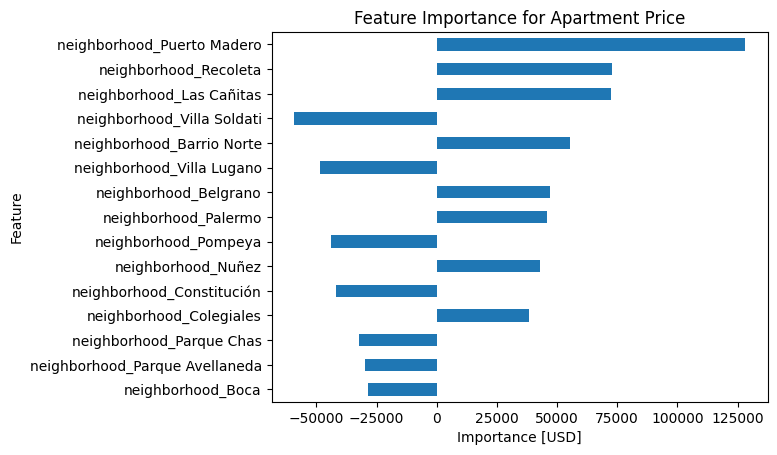

In [ ]:
feat_imp.sort_values(key=abs).tail(15).plot(kind="barh")
plt.xlabel("Importance [USD]")
plt.ylabel("Feature")
plt.title("Feature Importance for Apartment Price");

<font size="+3"><strong>2.4. Predicting Price with Size, Location, and Neighborhood</strong></font>

In [23]:
!pip install category_encoders

In [24]:
import warnings
from glob import glob

import pandas as pd
import seaborn as sns

from category_encoders import OneHotEncoder
from IPython.display import VimeoVideo
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge  # noqa F401
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.utils.validation import check_is_fitted

warnings.simplefilter(action="ignore", category=FutureWarning)


In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Prepare Data

## Import

In [26]:
def wrangle(filepath):
    # Read CSV file
    df = pd.read_csv(filepath,encoding="ISO-8859-1")

    # Subset data: Apartments in "Capital Federal", less than 400,000
    mask_ba = df["place_with_parent_names"].str.contains("Capital Federal")
    mask_apt = df["property_type"] == "apartment"
    mask_price = df["price_aprox_usd"] < 400_000
    df = df[mask_ba & mask_apt & mask_price]

    # Subset data: Remove outliers for "surface_covered_in_m2"
    low, high = df["surface_covered_in_m2"].quantile([0.1, 0.9])
    mask_area = df["surface_covered_in_m2"].between(low, high)
    df = df[mask_area]

    # Split "lat-lon" column
    df[["lat", "lon"]] = df["lat-lon"].str.split(",", expand=True).astype(float)
    df.drop(columns="lat-lon", inplace=True)

    # Get place name
    df["neighborhood"] = df["place_with_parent_names"].str.split("|", expand=True)[3]
    df.drop(columns="place_with_parent_names", inplace=True)

    # Drop features with high null counts
    df.drop(columns=["floor","expenses"], inplace= True)

    # Drop high or low cardinality features
    df.drop(columns=["operation","property_type","currency","properati_url"], inplace= True)

    # Drop Leaky features
    df.drop(columns=["price","price_aprox_local_currency","price_per_m2","price_usd_per_m2",], inplace= True)

    # Drop columns with multicollinearlity
    df.drop(columns=["surface_total_in_m2","rooms"], inplace= True)

    return df

**Task 2.4.1:** Use [`glob`](https://docs.python.org/3/library/glob.html#glob.glob) to create a list that contains the filenames for all the Buenos Aires real estate CSV files in the `data` directory. Assign this list to the variable name `files`.

- [<span id='technique'>Assemble a list of path names that match a pattern in <span id='tool'>glob.](../%40textbook/02-python-advanced.ipynb#Working-with-strings-)

In [27]:
files = glob("/content/drive/MyDrive/Data Analyst/Python/Project_2/buenos-aires-real-estate-*.csv")
files

['/content/drive/MyDrive/Data Analyst/Python/Project_2/buenos-aires-real-estate-1.csv',
 '/content/drive/MyDrive/Data Analyst/Python/Project_2/buenos-aires-real-estate-2.csv',
 '/content/drive/MyDrive/Data Analyst/Python/Project_2/buenos-aires-real-estate-3.csv',
 '/content/drive/MyDrive/Data Analyst/Python/Project_2/buenos-aires-real-estate-4.csv',
 '/content/drive/MyDrive/Data Analyst/Python/Project_2/buenos-aires-real-estate-5.csv']

In [28]:
# Check your work
assert len(files) == 5, f"`files` should contain 5 items, not {len(files)}"

**Task 2.4.2:** Use your `wrangle` function in a list comprehension to create a list named `frames`. The list should contain the cleaned DataFrames for the filenames your collected in `files`.

- [What's a list comprehension?](../%40textbook/02-python-advanced.ipynb#List-Comprehension-)
- [Write a list comprehension in Python](../%40textbook/02-python-advanced.ipynb#List-Comprehension-)

In [29]:
frames = [wrangle (file) for file in files]

In [30]:
type(frames)

list

In [31]:
len(frames)

5

In [32]:
frames[0].head()

,price_aprox_usd,surface_covered_in_m2,lat,lon,neighborhood
4,129000.0,70.0,-34.584651,-58.454693,Chacarita
9,87000.0,42.0,-34.638979,-58.500115,Villa Luro
29,118000.0,54.0,-34.615847,-58.459957,Caballito
40,57000.0,42.0,-34.625222,-58.382382,Constitución
41,90000.0,50.0,-34.610610,-58.412511,Once


**Task 2.4.3:** Use [`pd.concat`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) to concatenate it items in `frames` into a single DataFrame `df`. Make sure you set the `ignore_index` argument to `True`.

- [<span id='technique'>Concatenate two or more DataFrames using <span id='tool'>pandas.](../%40textbook/03-pandas-getting-started.ipynb#Concatenating)

In [33]:
df = pd.concat(frames, ignore_index= True)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6582 entries, 0 to 6581
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price_aprox_usd        6582 non-null   float64
 1   surface_covered_in_m2  6582 non-null   float64
 2   lat                    6316 non-null   float64
 3   lon                    6316 non-null   float64
 4   neighborhood           6582 non-null   object 
dtypes: float64(4), object(1)
memory usage: 257.2+ KB
None


,price_aprox_usd,surface_covered_in_m2,lat,lon,neighborhood
0,129000.0,70.0,-34.584651,-58.454693,Chacarita
1,87000.0,42.0,-34.638979,-58.500115,Villa Luro
2,118000.0,54.0,-34.615847,-58.459957,Caballito
3,57000.0,42.0,-34.625222,-58.382382,Constitución
4,90000.0,50.0,-34.610610,-58.412511,Once


## Explore

**Task 2.4.4:** Modify your `wrangle` function to drop any columns that are more than half `NaN` values. Be sure to rerun all the cells above before you continue.

- [<span id='technique'>Inspect a DataFrame using the `shape`, `info`, and `head` in <span id='tool'>pandas.](../%40textbook/03-pandas-getting-started.ipynb#Inspecting-DataFrames)
- [<span id='technique'>Drop a column from a DataFrame using <span id='tool'>pandas.](../%40textbook/03-pandas-getting-started.ipynb#Dropping-Columns)

In [34]:
df.isnull().sum()/len(df)

,0
price_aprox_usd,0.000000
surface_covered_in_m2,0.000000
lat,0.040413
lon,0.040413
neighborhood,0.000000


In [35]:
# Check your work
assert len(df) == 6582, f"`df` has the wrong number of rows: {len(df)}"
assert df.shape[1] <= 15, f"`df` has too many columns: {df.shape[1]}"

**Task 2.4.5:** Calculate the number of unique values for each non-numeric feature in `df`.

- [<span id='technique'>Subset a DataFrame's columns based on the column data types in <span id='tool'>pandas.](../%40textbook/04-pandas-advanced.ipynb#Subset-the-Columns-of-a-DataFrame-Based-on-Data-Types)
- [<span id='technique'>Calculate summary statistics for a DataFrame or Series in <span id='tool'>pandas.](../%40textbook/05-pandas-summary-statistics.ipynb#Working-with-Summary-Statistics)

In [36]:
df.select_dtypes("object").head()

,neighborhood
0,Chacarita
1,Villa Luro
2,Caballito
3,Constitución
4,Once


In [37]:
df.select_dtypes("object").nunique()

,0
neighborhood,57


In [38]:
# Check your work
assert len(df) == 6582, f"`df` has the wrong number of rows: {len(df)}"
assert df.shape[1] <= 11, f"`df` has too many columns: {df.shape[1]}"

**Task 2.4.7:** Modify your `wrangle` function to drop any features that would constitute leakage.

Be sure to rerun all the cells above before you continue.

- [What's <span id='term'>leakage?](../%40textbook/12-ml-core.ipynb#Leakage)
- [<span id='technique'>Drop a column from a DataFrame using <span id='tool'>pandas.](../%40textbook/03-pandas-getting-started.ipynb#Dropping-Columns)

In [39]:
sorted(df.columns)

['lat', 'lon', 'neighborhood', 'price_aprox_usd', 'surface_covered_in_m2']

In [40]:
# Check your work
assert len(df) == 6582, f"`df` has the wrong number of rows: {len(df)}"
assert df.shape[1] <= 7, f"`df` has too many columns: {df.shape[1]}"

**Task 2.4.8:** Plot a correlation heatmap of the remaining numerical features in `df`. Since `"price_aprox_usd"` will be your target, you don't need to include it in your heatmap.

- [What's a <span id='term'>heatmap?](../%40textbook/09-visualization-seaborn.ipynb#Correlation-Heatmaps)
- [<span id='technique'>Create a correlation matrix in <span id='tool'>pandas.](../%40textbook/07-visualization-pandas.ipynb#Correlation-Matrices)
- [<span id='technique'>Create a heatmap in <span id='tool'>seaborn.](../%40textbook/09-visualization-seaborn.ipynb#Correlation-Heatmaps)

<Axes: >

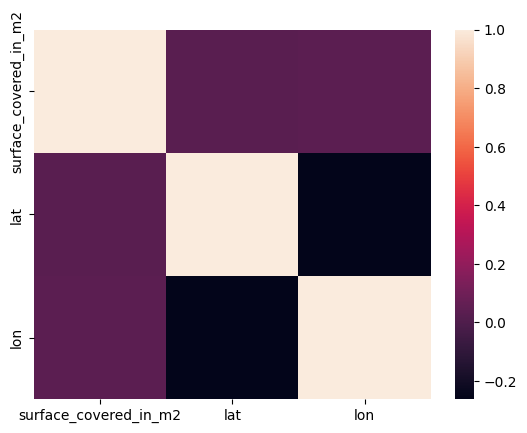

In [41]:
corr= df.select_dtypes("number").drop(columns="price_aprox_usd").corr()
sns.heatmap(corr)

**Task 2.4.9:** Modify your `wrangle` function to remove columns so that there are no strongly correlated features in your feature matrix.

Be sure to rerun all the cells above before you continue.

- [What's <span id='term'>multicollinearity?](../%40textbook/15-ml-regression.ipynb#Multicollinearity)
- [<span id='technique'>Drop a column from a DataFrame using <span id='tool'>pandas.](../%40textbook/03-pandas-getting-started.ipynb#Dropping-Columns)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6582 entries, 0 to 6581
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price_aprox_usd        6582 non-null   float64
 1   surface_covered_in_m2  6582 non-null   float64
 2   lat                    6316 non-null   float64
 3   lon                    6316 non-null   float64
 4   neighborhood           6582 non-null   object 
dtypes: float64(4), object(1)
memory usage: 257.2+ KB


In [43]:
# Check your work
assert len(df) == 6582, f"`df` has the wrong number of rows: {len(df)}"
assert df.shape[1] == 5, f"`df` has the wrong number of columns: {df.shape[1]}"
df.head()

,price_aprox_usd,surface_covered_in_m2,lat,lon,neighborhood
0,129000.0,70.0,-34.584651,-58.454693,Chacarita
1,87000.0,42.0,-34.638979,-58.500115,Villa Luro
2,118000.0,54.0,-34.615847,-58.459957,Caballito
3,57000.0,42.0,-34.625222,-58.382382,Constitución
4,90000.0,50.0,-34.610610,-58.412511,Once


## Split Data

**Task 2.4.10:** Create your feature matrix `X_train` and target vector `y_train`. Your target is `"price_aprox_usd"`. Your features should be all the columns that remain in the DataFrame you cleaned above.

- [What's a <span id='term'>feature matrix?](../%40textbook/15-ml-regression.ipynb#Linear-Regression)
- [What's a <span id='term'>target vector?](../%40textbook/15-ml-regression.ipynb#Linear-Regression)
- [<span id='technique'>Subset a DataFrame by selecting one or more columns in <span id='tool'>pandas.](../%40textbook/04-pandas-advanced.ipynb#Subset-a-DataFrame-by-Selecting-One-or-More-Columns)
- [<span id='technique'>Select a Series from a DataFrame in <span id='tool'>pandas.](../%40textbook/04-pandas-advanced.ipynb#Select-a-Series-from-a-DataFrame)

In [45]:
target = "price_aprox_usd"
features = ["neighborhood", "surface_covered_in_m2", "lat", "lon" ]
y_train = df[target]
X_train = df[features]

In [46]:
# Check your work
assert X_train.shape == (6582, 4), f"`X_train` is the wrong size: {X_train.shape}."
assert y_train.shape == (6582,), f"`y_train` is the wrong size: {y_train.shape}."

# Build Model

## Baseline

**Task 2.4.11:** Calculate the baseline mean absolute error for your model.

- [<span id='technique'>Calculate summary statistics for a DataFrame or Series in <span id='tool'>pandas.](../%40textbook/05-pandas-summary-statistics.ipynb#Working-with-Summary-Statistics)

In [47]:
y_mean = y_train.mean()
y_pred_baseline= [y_mean]* len(y_train)
print("Mean apt price:", round(y_mean,2))

print("Baseline MAE:", mean_absolute_error(y_train, y_pred_baseline ))

Mean apt price: 132383.84
Baseline MAE: 44860.10834274133


## Iterate

**Task 2.4.12:** Create a pipeline named `model` that contains a `OneHotEncoder`, `SimpleImputer`, and `Ridge` predictor.

- [What's <span id='term'>imputation?](../%40textbook/12-ml-core.ipynb#Imputation)
- [What's <span id='term'>one-hot encoding?](../%40textbook/13-ml-data-pre-processing-and-production.ipynb#One-Hot-Encoding)
- [What's a <span id='term'>pipeline?](../%40textbook/13-ml-data-pre-processing-and-production.ipynb#scikit-learn-in-Production)
- [<span id='technique'>Create a pipeline in <span id='tool'>scikit-learn.](../%40textbook/13-ml-data-pre-processing-and-production.ipynb#Creating-a-Pipeline-in-scikit-learn)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6582 entries, 0 to 6581
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price_aprox_usd        6582 non-null   float64
 1   surface_covered_in_m2  6582 non-null   float64
 2   lat                    6316 non-null   float64
 3   lon                    6316 non-null   float64
 4   neighborhood           6582 non-null   object 
dtypes: float64(4), object(1)
memory usage: 257.2+ KB


In [49]:
from sklearn.compose import ColumnTransformer

In [50]:
# Create the full pipeline
model = make_pipeline(
    ColumnTransformer(
        transformers=[
            ("num", SimpleImputer(strategy="mean"), ["surface_covered_in_m2", "lat", "lon"]),
            ("cat", make_pipeline(
                SimpleImputer(strategy="most_frequent"),
                OneHotEncoder(handle_unknown="ignore")
            ), ["neighborhood"])
        ]
    ),
    Ridge()
)


In [51]:
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['surface_covered_in_m2',
                                                   'lat', 'lon']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['neighborhood'])])),
                ('ridge', Ridge())])

In [52]:
# Check your work
check_is_fitted(model[-1])

## Evaluate

**Task 2.4.13:** Calculate the training mean absolute error for your predictions as compared to the true targets in `y_train`.
​
- [<span id='technique'>Generate predictions using a trained model in <span id='tool'>scikit-learn.](../%40textbook/15-ml-regression.ipynb#Generating-Predictions-Using-a-Trained-Model)
- [<span id='technique'>Calculate the mean absolute error for a list of predictions in <span id='tool'>scikit-learn.](../%40textbook/15-ml-regression.ipynb#Calculating-the-Mean-Absolute-Error-for-a-List-of-Predictions)

In [53]:
y_pred_training =model.predict(X_train)
print("Training MAE:", mean_absolute_error(y_train, y_pred_training))

Training MAE: 24207.10719033038


**Task 2.4.14:** Run the code below to import your test data `buenos-aires-test-features.csv` into a DataFrame and generate a list of predictions using your model. Then run the following cell to submit your predictions to the grader.

- [What's generalizability?](../%40textbook/12-ml-core.ipynb#Generalization)
- [<span id='technique'>Generate predictions using a trained model in <span id='tool'>scikit-learn.](../%40textbook/15-ml-regression.ipynb#Generating-Predictions-Using-a-Trained-Model)
- [<span id='technique'>Calculate the mean absolute error for a list of predictions in <span id='tool'>scikit-learn.](../%40textbook/15-ml-regression.ipynb#Calculating-the-Mean-Absolute-Error-for-a-List-of-Predictions)

In [58]:
X_test = pd.read_csv("/content/drive/MyDrive/Data Analyst/Python/Project_2/buenos-aires-test-features.csv",encoding="ISO-8859-1")

y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

,0
0,231122.403569
1,162572.942392
2,68477.949626
3,63521.438989
4,105694.463885


# Communicate Results

**Task 2.4.15:** Create a function `make_prediction` that takes four arguments (`area`, `lat`, `lon`, and `neighborhood`) and returns your model's prediction for an apartment price.

In [55]:
def make_prediction(area, lat, lon, neighborhood):
    data={"surface_covered_in_m2": area,
        "lat": lat,
         "lon": lon,
          "neighborhood":neighborhood
         }
    df = pd.DataFrame(data, index=[0])
    prediction = model.predict(df).round(2)[0]
    return f"Predicted apartment price: ${prediction}"

In [56]:
make_prediction(110, -34.60, -58.46, "Villa Crespo")

'Predicted apartment price: $250775.11'

**Task 2.4.16:** Add your `make_prediction` to the interact widget below, run the cell, and then adjust the widget to see how predicted apartment price changes.

- Create an interact function in Jupyter Widgets.

In [57]:
interact(
    make_prediction,
    area=IntSlider(
        min=X_train["surface_covered_in_m2"].min(),
        max=X_train["surface_covered_in_m2"].max(),
        value=X_train["surface_covered_in_m2"].mean(),
    ),
    lat=FloatSlider(
        min=X_train["lat"].min(),
        max=X_train["lat"].max(),
        step=0.01,
        value=X_train["lat"].mean(),
    ),
    lon=FloatSlider(
        min=X_train["lon"].min(),
        max=X_train["lon"].max(),
        step=0.01,
        value=X_train["lon"].mean(),
    ),
    neighborhood=Dropdown(options=sorted(X_train["neighborhood"].unique())),
);

interactive(children=(IntSlider(value=53, description='area', max=101, min=30), FloatSlider(value=-34.59890626…